# Data preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [2]:
cocoa = pd.read_csv('cocoa.csv', sep=';')
cocoa.head()

,Area,Item,Year,Unit,Value
0,Angola,Cocoa beans,1961,kg/ha,"250,0"
1,Angola,Cocoa beans,1962,kg/ha,"250,0"
2,Angola,Cocoa beans,1963,kg/ha,"214,3"
3,Angola,Cocoa beans,1964,kg/ha,"214,3"
4,Angola,Cocoa beans,1965,kg/ha,"285,7"


In [3]:
cocoa['Value'] = cocoa['Value'].str.replace(',', '.', regex=False).astype(float)
cocoa.drop(columns=['Item', 'Unit'], inplace=True)
cocoa.rename(columns={'Value': 'Yield'}, inplace=True)

In [4]:
pest = pd.read_csv('pesticides.csv')
pest.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [5]:
pest.drop(columns=['Domain', 'Element', 'Item', 'Unit'], inplace=True)
pest.rename(columns={'Value': 'Pesticides'}, inplace=True)

In [6]:
rain = pd.read_csv('rainfall.csv')
rain.head()

,Area,Year,average_rain_fall_mm_per_year
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


In [7]:
rain.rename(columns={'average_rain_fall_mm_per_year': 'Rain', ' Area': 'Area'},
            inplace=True)
rain['Rain'] = rain['Rain'].apply(pd.to_numeric, downcast='float',
                                  errors='coerce')

In [8]:
temp = pd.read_csv('temp.csv')
temp.head()

,year,country,avg_temp
0,1849,Côte D'Ivoire,25.58
1,1850,Côte D'Ivoire,25.52
2,1851,Côte D'Ivoire,25.67
3,1852,Côte D'Ivoire,NaN
4,1853,Côte D'Ivoire,NaN


In [9]:
temp.rename(columns={'avg_temp': 'Temp', 'year': 'Year', 'country': 'Area'}, inplace=True)

In [10]:
df = cocoa.merge(temp, on=['Year','Area']).merge(rain, on=['Year','Area']).merge(pest, on=['Year','Area'])
df.head()

,Area,Year,Yield,Temp,Rain,Pesticides
0,Angola,1990,52.2,24.12,1010.0,64.0
1,Angola,1991,79.8,24.02,1010.0,79.0
2,Angola,1992,90.9,23.96,1010.0,23.0
3,Angola,1993,77.3,24.15,1010.0,169.0
4,Angola,1994,76.9,24.04,1010.0,25.5


# Exploratory data analysis

In [11]:
df

,Area,Year,Yield,Temp,Rain,Pesticides
0,Angola,1990,52.2,24.12,1010.0,64.0
1,Angola,1991,79.8,24.02,1010.0,79.0
2,Angola,1992,90.9,23.96,1010.0,23.0
3,Angola,1993,77.3,24.15,1010.0,169.0
4,Angola,1994,76.9,24.04,1010.0,25.5
...,...,...,...,...,...,...
1697,Uganda,2009,348.8,24.18,1180.0,88.0
1698,Uganda,2010,358.5,24.14,1180.0,88.0
1699,Uganda,2011,363.8,23.89,1180.0,88.0
1700,Uganda,2012,376.0,24.03,1180.0,88.0


In [28]:
# Checking for missing values
df.isna().any()

,0
Area,False
Year,False
Yield,False
Temp,False
Rain,False
Pesticides,False


In [12]:
# Primary statistics
df.describe()

,Year,Yield,Temp,Rain,Pesticides
count,1702.000000,1702.000000,1702.000000,1702.000000,1702.000000
mean,2001.434783,452.783314,24.536340,1600.216216,51108.338067
std,7.065922,298.011918,3.149102,667.201327,75273.592170
min,1990.000000,34.300000,15.710000,758.000000,0.040000
25%,1995.000000,302.900000,22.500000,1083.000000,1737.227500
50%,2001.000000,395.600000,25.690000,1476.500000,34468.930000
75%,2008.000000,533.300000,26.970000,1976.000000,61257.000000
max,2013.000000,2900.800000,28.980000,3240.000000,367778.000000


<Axes: >

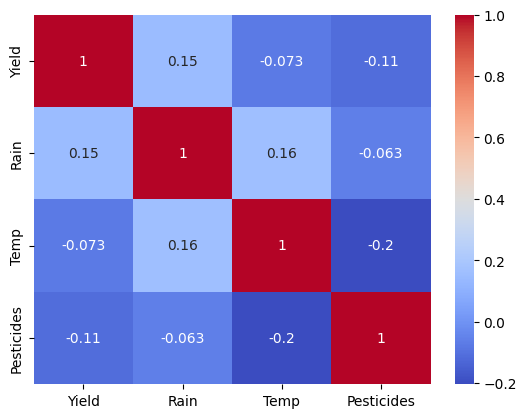

In [13]:
# Correlations
sns.heatmap(df[['Yield', 'Rain', 'Temp', 'Pesticides']].corr(),
            annot=True, cmap='coolwarm')

The value of yield is positively asscociated with the rainfall quantity, but decreases with a higher temperature and greater amont of pesticides used.

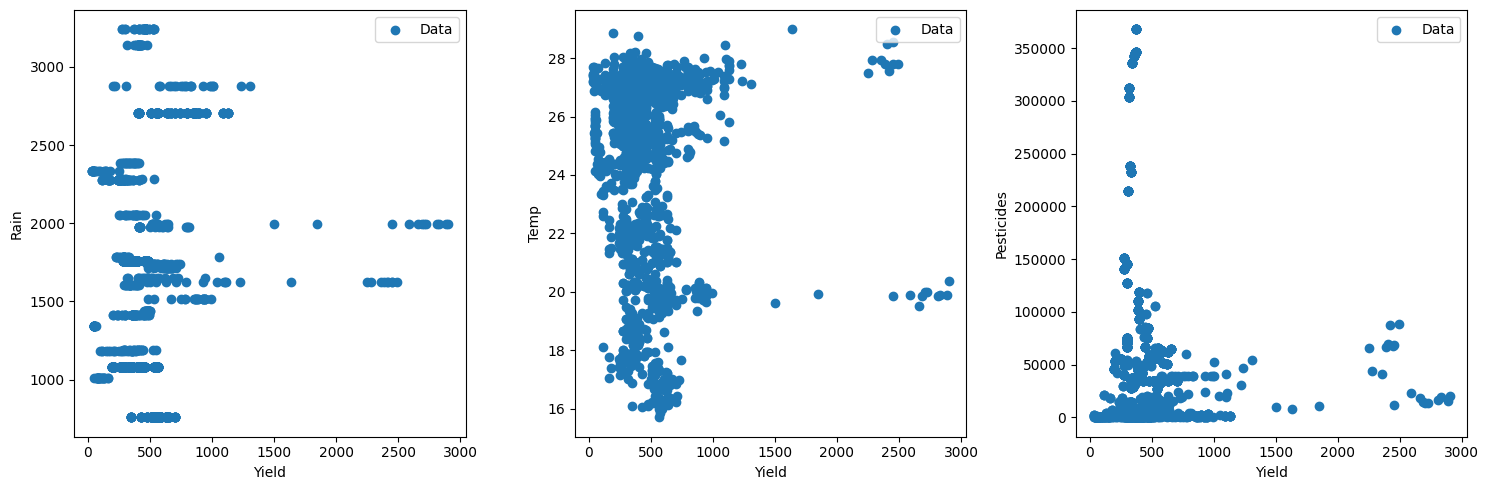

In [14]:
# Dependence visualisation
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

axs[0].scatter(df['Yield'], df['Rain'])
axs[0].set_xlabel('Yield')
axs[0].set_ylabel('Rain')

axs[1].scatter(df['Yield'], df['Temp'])
axs[1].set_xlabel('Yield')
axs[1].set_ylabel('Temp')

axs[2].scatter(df['Yield'], df['Pesticides'])
axs[2].set_xlabel('Yield')
axs[2].set_ylabel('Pesticides')

for ax in axs:
    ax.legend(['Data'])

plt.tight_layout()
plt.show();

# Model selection


In [15]:
features = df[['Rain', 'Temp', 'Pesticides']]
target = df['Yield']

In [16]:
# Scaling the features for stable model performance
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
features = scaler.fit_transform(features)

In [17]:
# Splitting the sample
from sklearn.model_selection import train_test_split
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.3, random_state=123)

### Linear regression

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

mse_lr = cross_val_score(lr,
                      train_features,
                      train_target,
                      scoring='neg_mean_squared_error',
                      cv=10)

print('Linear Regression MSE: ', np.abs(mse_lr.mean()))

Linear Regression MSE:  88899.76764059762


### Random Forest

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# grid_space_rf={'max_depth':[2, 3, 5, 10, None],
#               'n_estimators':[3, 5, 10, 20, 50],
#               'min_samples_leaf':[1,2,3]
#            }

# rf = RandomForestRegressor(random_state=0)
# grid_rf = GridSearchCV(rf, param_grid = grid_space_rf,cv=10,
#                     scoring='neg_mean_squared_error')
# model_grid_rf = grid_rf.fit(train_features, train_target)
# print('Best hyperparameters are: '+str(model_grid_rf.best_params_))

In [20]:
rf = RandomForestRegressor(**{'max_depth': None,
                              'min_samples_leaf': 1, 'n_estimators': 3})
mse_rf = cross_val_score(rf,
                      train_features,
                      train_target,
                      scoring='neg_mean_squared_error',
                      cv=10)

print('Random Forest MSE: ', np.abs(mse_rf.mean()))

Random Forest MSE:  44975.090507269735


### Gradient boosting

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

# grid_space_gb={'max_depth':[2, 3, 5, 10, None],
#               'n_estimators':[3, 5, 10, 20, 50, 100],
#               'min_samples_leaf':[1,2,3],
#               'learning_rate':[0.01, 0.05, 0.1, 0.2]

#            }

# gb = GradientBoostingRegressor(random_state=0)
# grid_gb = GridSearchCV(gb, param_grid = grid_space_gb, cv=10,
#                     scoring='neg_mean_squared_error')
# model_grid_gb = grid_gb.fit(train_features, train_target)
# print('Best hyperparameters are: '+str(model_grid_gb.best_params_))

In [22]:
gb = GradientBoostingRegressor(**{'learning_rate': 0.2, 'max_depth': 5,
                                  'min_samples_leaf': 3, 'n_estimators': 100})

mse_gb = cross_val_score(gb,
                      train_features,
                      train_target,
                      scoring='neg_mean_squared_error',
                      cv=10)

print('Gradient boosting MSE: ', np.abs(mse_gb.mean()))

Gradient boosting MSE:  24464.25631018963


Let us evaluate the performance of the models on the test sample:

In [23]:
from sklearn.metrics import mean_squared_error

mse_cv = [np.abs(x.mean()) for x in [mse_lr, mse_rf, mse_gb]]
mse_test = []

for model in [lr, rf, gb]:
  model.fit(train_features, train_target)
  pred = model.predict(test_features)
  mse_test.append(mean_squared_error(pred, test_target))


In [24]:
metrics = {'Model': ['Linear regression', 'Random Forest', 'Gradient boosting'],
        'Cross-validation MSE score': mse_cv,
        'Out-of-sample MSE score': mse_test}

pd.DataFrame(metrics)

,Model,Cross-validation MSE score,Out-of-sample MSE score
0,Linear regression,88899.767641,75772.885194
1,Random Forest,44975.090507,24004.172100
2,Gradient boosting,24464.256310,12102.491130


As we see, gradient boosting outperforms the two other models.

# Implementation

In [25]:
# Training the selected model on all available data
gb.fit(features, target)

# Forecasting function
def predict_yield():
  temp = float(input('Enter the average temperature throughout the year (Celcius): '))
  rain = float(input('Enter the average rainfall throughout the year (mm): '))
  pest = float(input('Enter the amount of pesticides used (thousand of tonnes): '))
  new_data = pd.DataFrame({'Rain': [rain],
                           'Temp': [temp],
                           'Pesticides': [pest]})

  new_data = scaler.transform(new_data)

  forecast = gb.predict(new_data)

  print(f'The estimated value of future yield is {(forecast[0]).astype(int)} kg/ha of cocoa beans')

Let us suppose the average temperature throughout the year is 30°C, the rainfall is 1000 mm per year and the use of pesticides accounts for 50m tonnes. Now we can use the estimated model to predict the future yield:

In [26]:
# Example of implementation
predict_yield()

Enter the average temperature throughout the year (Celcius): 30
Enter the average rainfall throughout the year (mm): 1000
Enter the amount of pesticides used (thousand of tonnes): 50000
The estimated value of future yield is 379 kg/ha of cocoa beans
